Importing Required Libraries

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the given dataset

df = pd.read_csv("/content/train.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Checking the shape of given data

df.shape

(614, 13)

In [5]:
# Checking for unique values of each feature

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# Checking the info of the given data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking the column names

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Checking for NaN values in the given dataset

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Droping the unnecessary column

df.drop(columns='Loan_ID', inplace=True)

In [10]:
# Seperating numerical columns and categorical columns

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'Credit_History', 'Property_Area']

In [11]:
# Replacing NaN values in the categorical columns with their mode value

from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(df[cat_cols])

df[cat_cols] = cat_imputer.transform(df[cat_cols])


In [12]:
# Replacing NaN values in the numerical columns with their mean value

num_imputer = SimpleImputer(strategy="mean")
num_imputer.fit(df[num_cols])

df[num_cols] = num_imputer.transform(df[num_cols])


In [13]:
# Checking for NaN values in the given dataset

df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Label Encoding the Married, Education, Dependents, Self_Employed, Property_Area and Loan_status column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Married"] = le.fit_transform(df["Married"])

In [15]:
df["Education"] = le.fit_transform(df["Education"])

In [16]:
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])

In [17]:
df["Property_Area"] = le.fit_transform(df["Property_Area"])

In [18]:
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [19]:
df["Dependents"] = le.fit_transform(df["Dependents"])

In [20]:
# preprocessing as per the domain knowledge

df['ApplicantIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns='CoapplicantIncome',inplace=True)

Visual Analysis

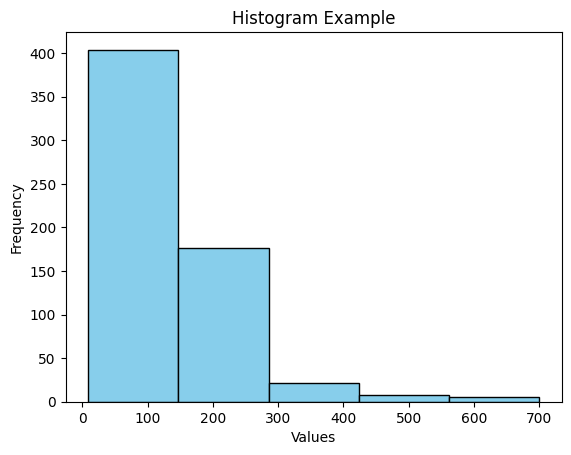

In [21]:
# Univariate Analysis

data = df['LoanAmount']

# Create histogram
plt.hist(data, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show plot
plt.show()

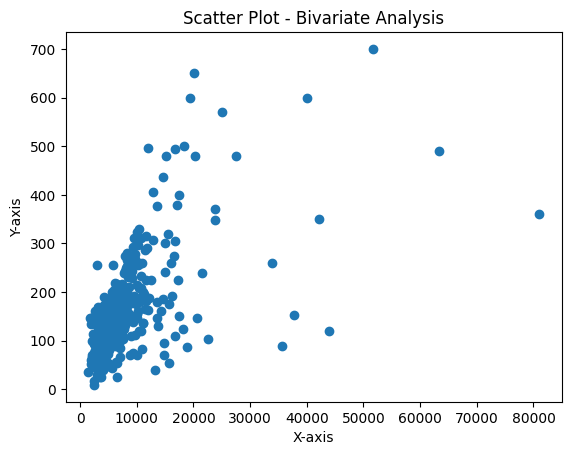

In [22]:
# Bivariate Analysis

# Create the scatter plot
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot - Bivariate Analysis")

# Show the plot
plt.show()

<ipython-input-23-1a855ea9fc1f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

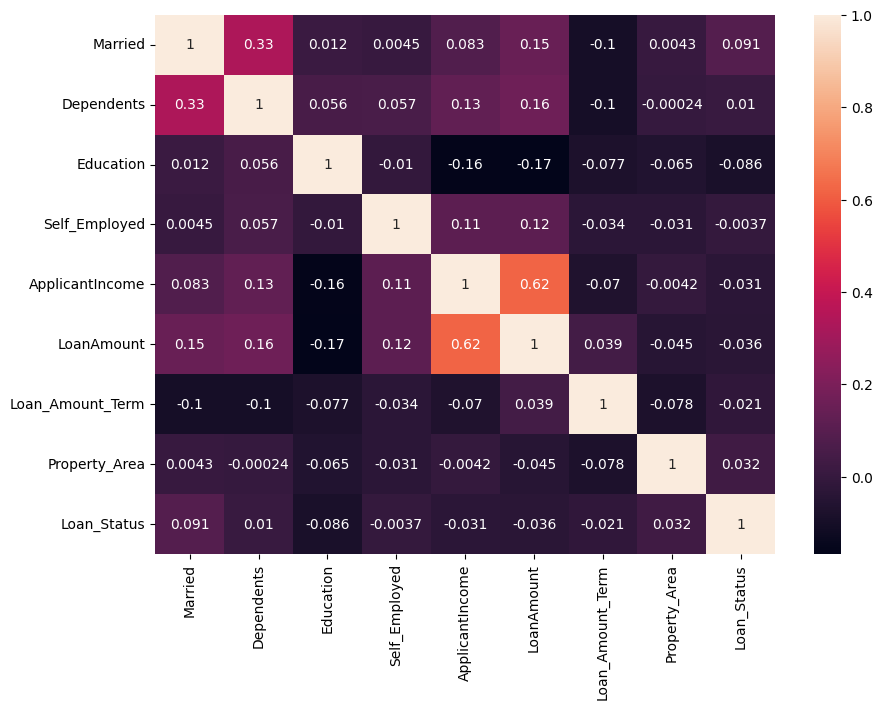

In [23]:
# Multivariate visual analysis

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [24]:
# Splitting the data into X and Y

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [25]:
# Using onehot encoder to encode Gender column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
X

array([[0.0, 1.0, 0, ..., 360.0, 1.0, 2],
       [0.0, 1.0, 1, ..., 360.0, 1.0, 0],
       [0.0, 1.0, 1, ..., 360.0, 1.0, 2],
       ...,
       [0.0, 1.0, 1, ..., 360.0, 1.0, 2],
       [0.0, 1.0, 1, ..., 360.0, 1.0, 2],
       [1.0, 0.0, 0, ..., 360.0, 0.0, 1]], dtype=object)

In [27]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [29]:
# Set up a Classification Experiment
import pycaret
from pycaret.classification import ClassificationExperiment
from pycaret import *
from pycaret.classification import *

exp = ClassificationExperiment()

In [30]:
s = setup(data=X, target=Y)

,Description,Value
0,Session id,2949
1,Target,target
2,Target type,Binary
3,Original data shape,"(614, 12)"
4,Transformed data shape,"(614, 26)"
5,Transformed train set shape,"(429, 26)"
6,Transformed test set shape,"(185, 26)"
7,Categorical features,11
8,Preprocess,True
9,Imputation type,simple


In [31]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8251,0.0000,0.9830,0.8090,0.8866,0.5153,0.5639,0.1580
ridge,Ridge Classifier,0.8228,0.0000,0.9830,0.8066,0.8853,0.5086,0.5578,0.1590
lr,Logistic Regression,0.8134,0.0000,0.9660,0.8054,0.8776,0.4945,0.5310,1.2580
ada,Ada Boost Classifier,0.8040,0.0000,0.9454,0.8084,0.8703,0.4737,0.4925,0.2360
rf,Random Forest Classifier,0.7996,0.0000,0.9220,0.8155,0.8643,0.4822,0.4981,0.3250
nb,Naive Bayes,0.7854,0.0000,0.9017,0.8108,0.8525,0.4579,0.4737,0.1530
gbc,Gradient Boosting Classifier,0.7854,0.0000,0.9114,0.8064,0.8543,0.4456,0.4596,0.3870
lightgbm,Light Gradient Boosting Machine,0.7738,0.0000,0.8807,0.8145,0.8430,0.4291,0.4433,0.5590
xgboost,Extreme Gradient Boosting,0.7692,0.0000,0.8574,0.8222,0.8365,0.4362,0.4461,0.2110
dt,Decision Tree Classifier,0.7668,0.0000,0.8370,0.8287,0.8317,0.4475,0.4505,0.1530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

std_xtrain = ss.transform(x_train)
std_xtest = ss.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(std_xtrain, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(std_xtest))

0.8048780487804879

In [38]:
#hyper parameter tuning

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'LR__penalty':['l1','l2','elasticnet','none'],
                'LR__C':np.linspace(1, 10, 10),
                'LR__l1_ratio':np.linspace(0.001,0.9999, 5),
               }


from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

mysteps = [('ss',StandardScaler()), ('LR',LogisticRegression(random_state=1, solver = 'saga', max_iter = 1000, tol = 0.00))]

m_pipe = Pipeline(steps = mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ss',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('LR',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=1000,
                                                                 multi_class='auto',
                                                                 n_jobs...
                                                                 verbose=0,
                                                                 warm_start=False))],
                                      verbose=False),
                   n_iter=10, n_jobs=None,
                   param_distributions={'LR__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'LR__l1_ratio': array([0.001   , 0.250725, 0.50045 , 0.750175, 0.9999  ]),
                                        'LR__penalty': ['l1', 'l2',
                                                        'elasticnet', 'none']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [39]:
rcv.best_params_

{'LR__penalty': 'l2', 'LR__l1_ratio': 0.750175, 'LR__C': 7.0}

In [40]:
rcv.best_score_

0.8045715047314406

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(random_state = 1)
adaboost = AdaBoostClassifier()

hyper_params = {'n_estimators':range(50, 121, 5),# No. of Decision Trees
                'learning_rate':np.linspace(0.3, 0.5, 20)
               }

skf = StratifiedKFold(n_splits = 5)


rcv = RandomizedSearchCV(adaboost, param_distributions =  hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.3       , 0.31052632, 0.32105263, 0.33157895, 0.34210526,
       0.35263158, 0.36315789, 0.37368421, 0.38421053, 0.39473684,
       0.40526316, 0.41578947, 0.42631579, 0.43684211, 0.44736842,
       0.45789474, 0.46842105, 0.47894737, 0.48947368, 0.5       ]),
                                        'n_estimators': range(50, 121, 5)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [44]:
rcv.best_params_

{'n_estimators': 110, 'learning_rate': 0.4789473684210526}

In [45]:
rcv.best_score_

0.7996801279488205

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'criterion':['gini', 'entropy'],
                'ccp_alpha':np.linspace(0,0.0000001,3),
                'max_features':np.linspace(0.3, 0.8, 6), # Fetaure Bagging
                'max_samples':np.linspace(0.9, 1, 3),# Instance Bagging
                'n_estimators':range(80, 121, 10)# No. of Decision Trees
                }

skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(rfc, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fractio...
                                                    warm_start=False),
                   n_iter=10, n_jobs=None,
                   param_distributions={'ccp_alpha': array([0.e+00, 5.e-08, 1.e-07]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'max_samples': array([0.9 , 0.95, 1.  ]),
                                        'n_estimators': range(80, 121, 10)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [49]:
rcv.best_params_

{'n_estimators': 110,
 'max_samples': 1.0,
 'max_features': 0.7,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [50]:
rcv.best_score_

0.7866586698653872

In [51]:
#  Saving the best model

joblib.dump(lr,"trained_model.pkl")

['trained_model.pkl']

**Summary**

From the analysis the NaN values are imputed with Mean and Mode values.

Then encoded the categorical values with label and one hot encoders.

Then visualized the dataset for correlation analysis and used pycaret library to compare the models.

Finally trained the models and tuned the models with hyperparameters.

From the analysis Logistic Regression model out perfomed other models and
the model is saved using joblib.

